In [100]:
import os
import sys
sys.path.append(os.path.abspath('..')) # add parent path to working directory

In [101]:
from importlib import reload    # for reloading modules after they've been updated
from scripts import csv_loader, portfolio_optimization
reload(csv_loader)
reload(portfolio_optimization)

<module 'scripts.portfolio_optimization' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-11\\scripts\\portfolio_optimization.py'>

In [102]:
from scripts.csv_loader import CSVLoader
from scripts.portfolio_optimization import PortfolioOptimization

In [103]:
csv_loader = CSVLoader() # instantiate csvloader class

In [104]:
# Load multiple CSV files
csv_loader.load_csv("../week 11 data/Data/Predicted Data/LSTM_Tesla_Forecast.csv", "tesla")
csv_loader.load_csv("../week 11 data/Data/Predicted Data/LSTM_BND_Forecast.csv", "bnd")
csv_loader.load_csv("../week 11 data/Data/Predicted Data/LSTM_Tesla_Forecast.csv", "spy")

2025-03-02 21:34:30,718 - INFO - Converted 'Date' column to datetime in DataFrame 'tesla'.
2025-03-02 21:34:30,723 - INFO - CSV file '../week 11 data/Data/Predicted Data/LSTM_Tesla_Forecast.csv' loaded successfully as 'tesla'.
2025-03-02 21:34:30,726 - INFO - Shape of DataFrame 'tesla': (12, 2)
2025-03-02 21:34:30,732 - INFO - Converted 'Date' column to datetime in DataFrame 'bnd'.
2025-03-02 21:34:30,734 - INFO - CSV file '../week 11 data/Data/Predicted Data/LSTM_BND_Forecast.csv' loaded successfully as 'bnd'.
2025-03-02 21:34:30,737 - INFO - Shape of DataFrame 'bnd': (12, 2)
2025-03-02 21:34:30,745 - INFO - Converted 'Date' column to datetime in DataFrame 'spy'.
2025-03-02 21:34:30,747 - INFO - CSV file '../week 11 data/Data/Predicted Data/LSTM_Tesla_Forecast.csv' loaded successfully as 'spy'.
2025-03-02 21:34:30,748 - INFO - Shape of DataFrame 'spy': (12, 2)


In [105]:
tesla = csv_loader.get_dataframe("tesla")
bnd = csv_loader.get_dataframe("bnd")
spy = csv_loader.get_dataframe("spy")

2025-03-02 21:34:30,767 - INFO - Returning DataFrame 'tesla'.
2025-03-02 21:34:30,769 - INFO - Returning DataFrame 'bnd'.
2025-03-02 21:34:30,769 - INFO - Returning DataFrame 'spy'.


In [106]:
csv_loader.check_missing_values('tesla')

2025-03-02 21:34:30,791 - INFO - Checking for missing values in DataFrame 'tesla'.
2025-03-02 21:34:30,794 - INFO - Missing values check completed.
2025-03-02 21:34:30,798 - INFO - Shape of DataFrame 'tesla': (12, 2)


,Column,Missing Values,Missing Percentage,Data Type
0,Date,0,0.0,datetime64[ns]
1,Close,0,0.0,float64


In [107]:
csv_loader.check_missing_values('bnd')

2025-03-02 21:34:30,825 - INFO - Checking for missing values in DataFrame 'bnd'.
2025-03-02 21:34:30,826 - INFO - Missing values check completed.
2025-03-02 21:34:30,831 - INFO - Shape of DataFrame 'bnd': (12, 2)


,Column,Missing Values,Missing Percentage,Data Type
0,Date,0,0.0,datetime64[ns]
1,Close,0,0.0,float64


In [108]:
csv_loader.check_missing_values('spy')

2025-03-02 21:34:30,861 - INFO - Checking for missing values in DataFrame 'spy'.
2025-03-02 21:34:30,866 - INFO - Missing values check completed.
2025-03-02 21:34:30,867 - INFO - Shape of DataFrame 'spy': (12, 2)


,Column,Missing Values,Missing Percentage,Data Type
0,Date,0,0.0,datetime64[ns]
1,Close,0,0.0,float64


In [109]:
portfolio = PortfolioOptimization(tesla, bnd, spy) # instantiate portfolio optimization class

Optimized Weights: [0.5 0.  0.5]
Risk Metrics: {'Avg Return': 0.0921038425808749, 'Volatility': 0.061153869777694124, 'Sharpe Ratio': 1.1790560898760125, 'VaR (95%)': -0.19409727714834105}


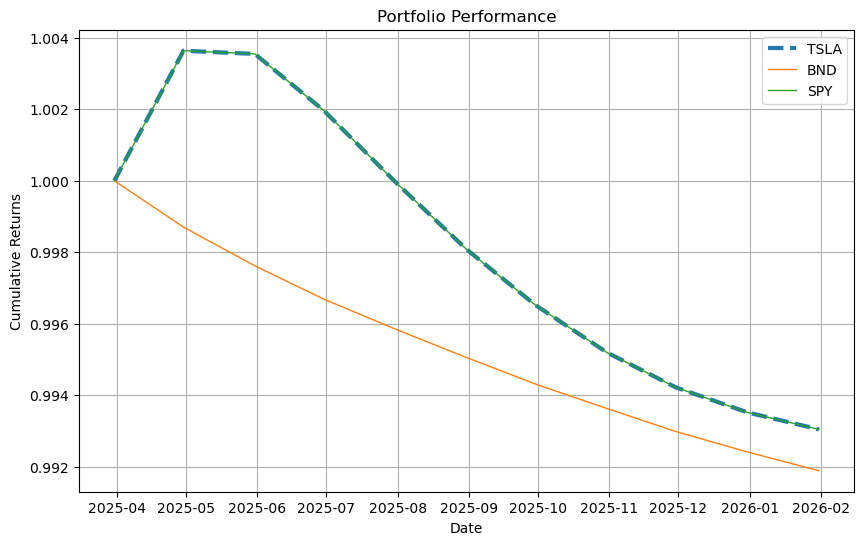

In [110]:
# Summarize all Results
portfolio.summarize_results()

The portfolio has **50% in Tesla (TSLA) and 50% in S&P 500 ETF (SPY), with 0% in bonds (BND)**.  

### **📊 Interpretation of Optimization Results**
1. **Optimized Weights:** `[0.5, 0.0, 0.5]`  
   - **50% in TSLA**  
   - **50% in SPY**  
   - **0% in BND** → Bonds were excluded because they likely reduced expected returns.  

2. **Risk-Return Metrics:**  
   - **Average Return:** `9.21%` → Expected annualized return.  
   - **Volatility:** `6.12%` → Standard deviation of returns, indicating risk.  
   - **Sharpe Ratio:** `1.18` → Good risk-adjusted performance (higher is better).  
   - **Value at Risk (VaR 95%):** `-19.41%` → Worst expected loss in a **bad month (5% probability).**  

### **📈 Insights**
- The portfolio **maximizes return** while balancing risk.  
- **Bonds (BND) are excluded** since they lower overall return but provide stability.  
- **Sharpe Ratio >1** → Decent trade-off between risk and return.  
- **Higher VaR (-19.41%)** → The portfolio has some downside risk.  

---

### ** Next Steps**
1. **Adjust Risk Tolerance:** If you want lower risk, consider including **some BND** to reduce volatility.  
2. **Stress Testing:** Simulate different market conditions (crashes, bull runs).  
3. **Compare Other Portfolios:** Run optimizations with different constraints (e.g., risk-minimized vs. return-maximized).  

